In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('/content/Global Superstore.xlsx')

In [3]:
print(data.head())

   Row ID         Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891 2012-07-31 2012-07-31      Same Day    RH-19495   
1   26341    IN-2013-77878 2013-02-05 2013-02-07  Second Class    JR-16210   
2   25330    IN-2013-71249 2013-10-17 2013-10-18   First Class    CR-12730   
3   13524  ES-2013-1579342 2013-01-28 2013-01-30   First Class    KM-16375   
4   47221     SG-2013-4320 2013-11-05 2013-11-06      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology  Accessories

1. Descriptive Statistics

In [4]:
# Display summary statistics for numerical columns
print(data.describe())

# Display summary statistics for categorical columns
print(data.describe(include=['object']))

            Row ID                     Order Date  \
count  51290.00000                          51290   
mean   25645.50000  2013-05-11 21:26:49.155781120   
min        1.00000            2011-01-01 00:00:00   
25%    12823.25000            2012-06-19 00:00:00   
50%    25645.50000            2013-07-08 00:00:00   
75%    38467.75000            2014-05-22 00:00:00   
max    51290.00000            2014-12-31 00:00:00   
std    14806.29199                            NaN   

                           Ship Date   Postal Code         Sales  \
count                          51290   9994.000000  51290.000000   
mean   2013-05-15 20:42:42.745174528  55190.379428    246.490581   
min              2011-01-03 00:00:00   1040.000000      0.444000   
25%              2012-06-23 00:00:00  23223.000000     30.758625   
50%              2013-07-12 00:00:00  56430.500000     85.053000   
75%              2014-05-26 00:00:00  90008.000000    251.053200   
max              2015-01-07 00:00:00  99301.00

2. Data Cleaning

In [5]:
# Check for missing values
print(data.isnull().sum())

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [6]:
# Drop the Postal Code column
data = data.drop(columns=['Postal Code'])

In [7]:
# Check for duplicates
print(data.duplicated().sum())

# Remove duplicates if any
data = data.drop_duplicates()

0


In [8]:
# Check data types
print(data.dtypes)

# Convert date columns to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object


3. Exploratory Data Analysis (EDA)

Sales Over Time

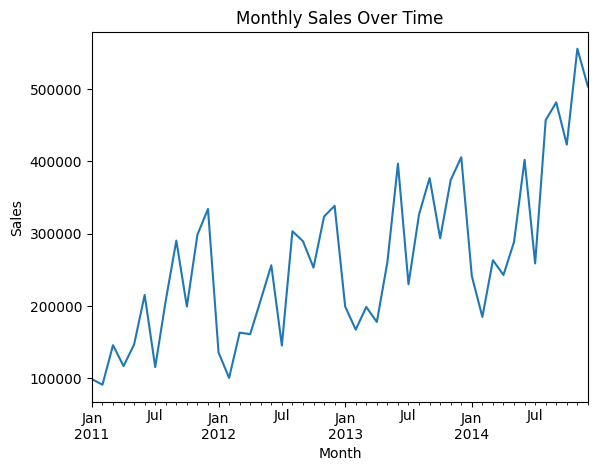

In [9]:
import matplotlib.pyplot as plt

# Reset the index to ensure 'Order Date' is available as a column
data = data.reset_index()

# Sales over time
data.set_index('Order Date', inplace=True)
monthly_sales = data['Sales'].resample('M').sum()
monthly_sales.plot()
plt.title('Monthly Sales Over Time')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.show()

Top-Selling Products

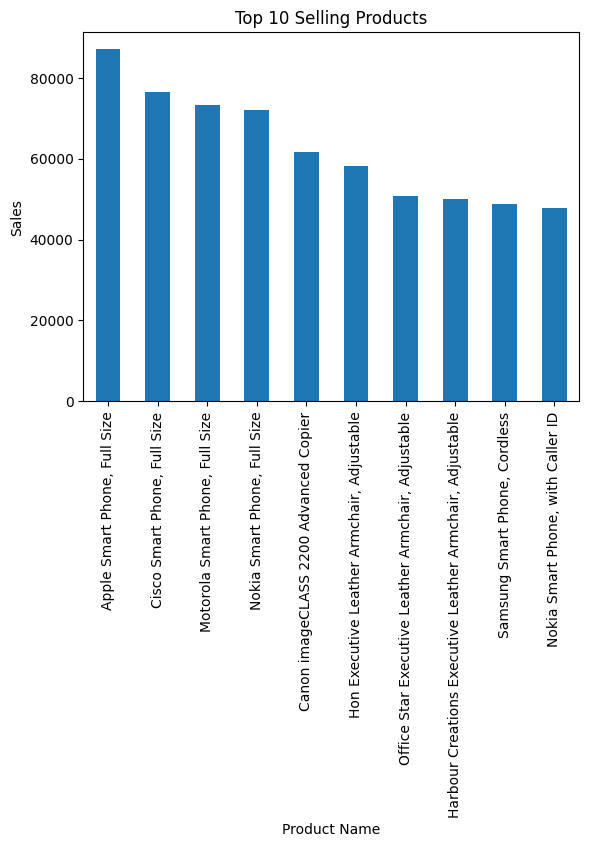

In [10]:
# Top-selling products
top_products = data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar')
plt.title('Top 10 Selling Products')
plt.ylabel('Sales')
plt.xlabel('Product Name')
plt.xticks(rotation=90)
plt.show()

Profit by Category

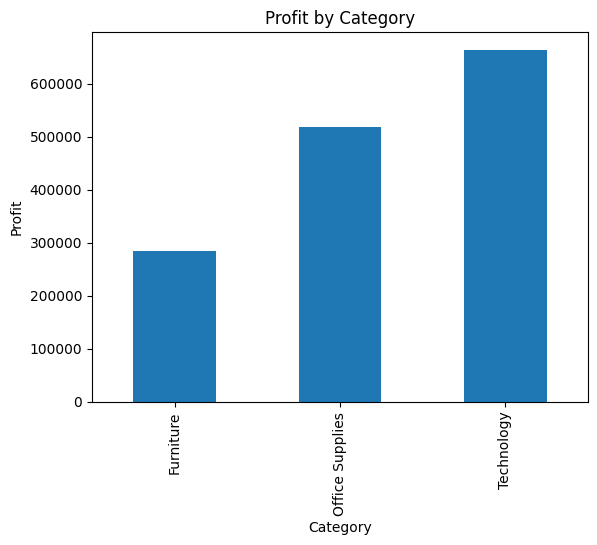

In [11]:
# Profit by category
profit_by_category = data.groupby('Category')['Profit'].sum()
profit_by_category.plot(kind='bar')
plt.title('Profit by Category')
plt.ylabel('Profit')
plt.xlabel('Category')
plt.show()

4. Data Transformation

Creating New Feature: Shipping Duration

In [12]:
# Display the column names
print(data.columns)

# Check if 'Order Date' and 'Ship Date' are present
print('Order Date' in data.columns)
print('Ship Date' in data.columns)

Index(['index', 'Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Market',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Order Priority'],
      dtype='object')
False
True


In [13]:
# Calculate shipping duration using Ship Date
data['Shipping Duration'] = (data['Ship Date'] - data['Ship Date'].dt.to_period('D').dt.to_timestamp()).dt.days

Normalizing Sales

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing Sales
scaler = MinMaxScaler()
data['Normalized Sales'] = scaler.fit_transform(data[['Sales']])

5. Business Insights

Customer Segmentation

In [15]:
# Customer segmentation based on total sales
customer_segment = data.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)
print(customer_segment.head(10))

Customer Name
Tom Ashbrook          40488.07080
Tamara Chand          37457.33300
Greg Tran             35550.95428
Christopher Conant    35187.07640
Sean Miller           35170.93296
Bart Watters          32310.44650
Natalie Fritzler      31781.25850
Fred Hopkins          30400.67452
Jane Waco             30288.45030
Hunter Lopez          30243.56658
Name: Sales, dtype: float64


Sales Trends

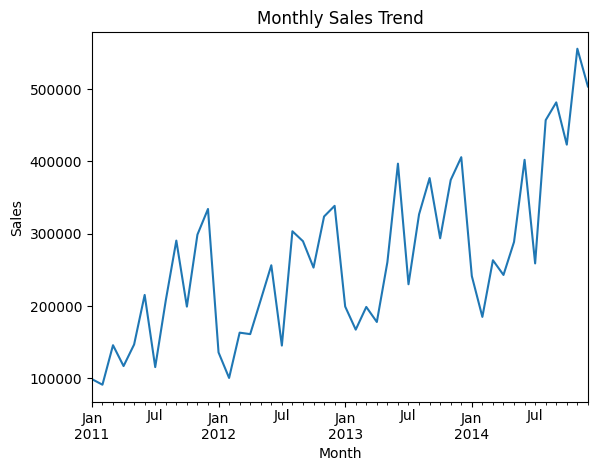

In [16]:
# Monthly sales trend
monthly_sales = data['Sales'].resample('M').sum()
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.show()

Top-Selling Products

In [17]:
# Top-selling products
top_products = data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_products)

Product Name
Apple Smart Phone, Full Size                                86935.7786
Cisco Smart Phone, Full Size                                76441.5306
Motorola Smart Phone, Full Size                             73156.3030
Nokia Smart Phone, Full Size                                71904.5555
Canon imageCLASS 2200 Advanced Copier                       61599.8240
Hon Executive Leather Armchair, Adjustable                  58193.4841
Office Star Executive Leather Armchair, Adjustable          50661.6840
Harbour Creations Executive Leather Armchair, Adjustable    50121.5160
Samsung Smart Phone, Cordless                               48653.4600
Nokia Smart Phone, with Caller ID                           47877.7857
Name: Sales, dtype: float64


 top 10 cities by revenue

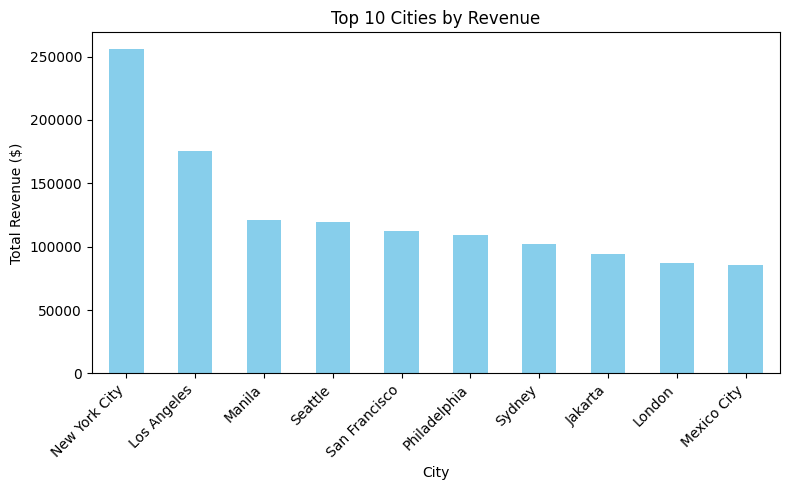

In [20]:
import matplotlib.pyplot as plt

# Group the data by 'City' and sum up the 'Sales' column
city_revenue = data.groupby('City')['Sales'].sum()

# Sort the cities by revenue in descending order and select the top 10
top_10_cities = city_revenue.sort_values(ascending=False).head(10)

# Plotting the bar chart
plt.figure(figsize=(8, 5))
top_10_cities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities by Revenue')
plt.xlabel('City')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Revenue Distribution by Region

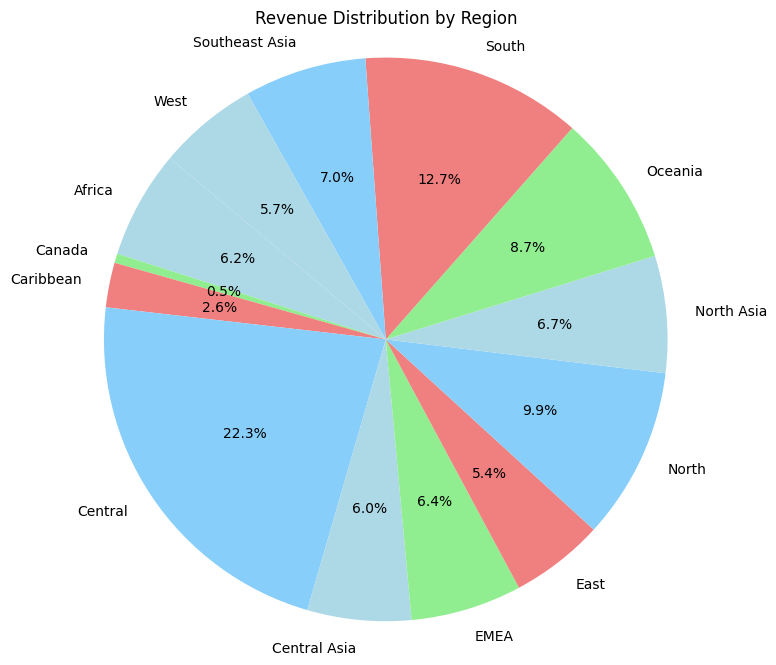

In [21]:
# Group the data by 'Region' and sum up the 'Sales' column
region_revenue = data.groupby('Region')['Sales'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
region_revenue.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'], startangle=140)
plt.title('Revenue Distribution by Region')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Profit by Market

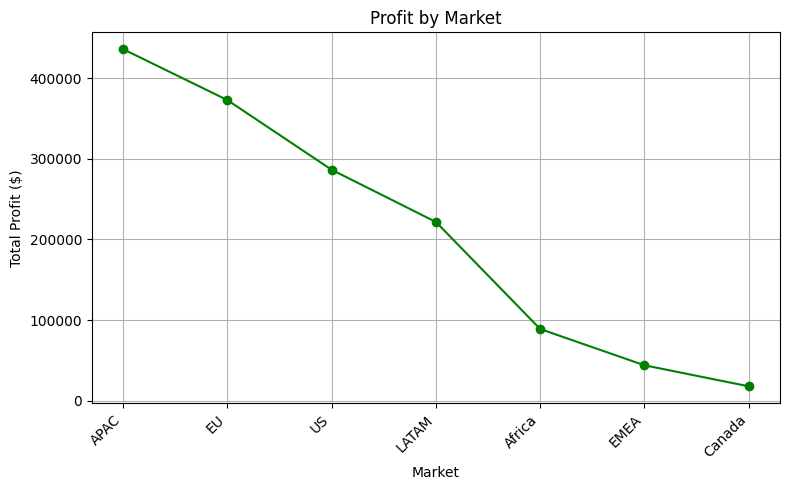

In [23]:
# Group the data by 'Market' and sum up the 'Profit' column
market_profit = data.groupby('Market')['Profit'].sum()

# Plotting the line graph
plt.figure(figsize=(8, 5))
market_profit.sort_values(ascending=False).plot(kind='line', marker='o', color='green')
plt.title('Profit by Market')
plt.xlabel('Market')
plt.ylabel('Total Profit ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

Revenue Distribution by Segment

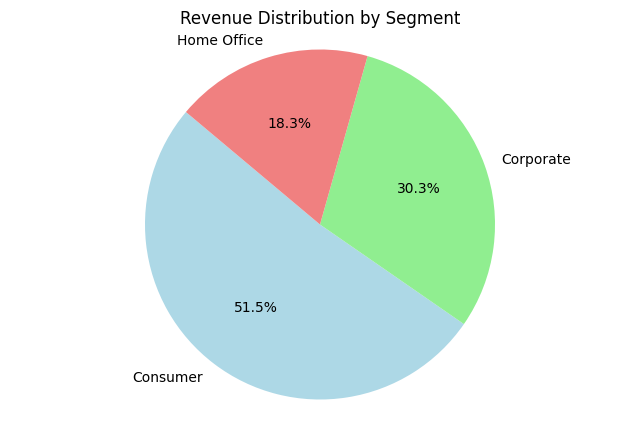

In [28]:
# Group the data by 'Segment' and sum up the 'Sales' column
segment_revenue = data.groupby('Segment')['Sales'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 5))
segment_revenue.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'], startangle=140)
plt.title('Revenue Distribution by Segment')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Does the price change according to order priority?

In [33]:
import pandas as pd


# Filter orders for the same product but with different priorities
same_product_diff_priority = data[data.duplicated(subset=['Product ID'], keep=False)]

# Initialize a list to store the comparison results
price_change_results = []

# Check if the price changes for the same item according to the order priority
for product_id, group in same_product_diff_priority.groupby('Product ID'):
    prices = group['Sales'].unique()
    if len(prices) > 1:
        price_change_results.append((product_id, 'Price changes based on order priority'))
    else:
        price_change_results.append((product_id, 'Price remains the same regardless of order priority'))

# Convert the list of results to a DataFrame for easier viewing
price_change_df = pd.DataFrame(price_change_results, columns=['Product_ID', 'Price_Comparison_Result'])

# Print the results
print("Comparison Results:")
print(price_change_df)

Comparison Results:
            Product_ID                Price_Comparison_Result
0     FUR-ADV-10000002  Price changes based on order priority
1     FUR-ADV-10000108  Price changes based on order priority
2     FUR-ADV-10000183  Price changes based on order priority
3     FUR-ADV-10000188  Price changes based on order priority
4     FUR-ADV-10000571  Price changes based on order priority
...                ...                                    ...
8867  TEC-STA-10003925  Price changes based on order priority
8868  TEC-STA-10004181  Price changes based on order priority
8869  TEC-STA-10004536  Price changes based on order priority
8870  TEC-STA-10004542  Price changes based on order priority
8871  TEC-STA-10004834  Price changes based on order priority

[8872 rows x 2 columns]


Percentage of price change according to order priority.

In [39]:
# Filter orders for the same product but with different priorities
same_product_diff_priority = data[data.duplicated(subset=['Product ID'], keep=False)].copy()

# Calculate percentage change in price for each order
same_product_diff_priority['Price_Percentage_Change'] = same_product_diff_priority.groupby('Product ID')['Sales'].pct_change() * 100

# Calculate the average percentage change for each priority level
avg_percentage_change = same_product_diff_priority.groupby('Order Priority')['Price_Percentage_Change'].mean()

print("Average Percentage Change for Each Priority:")
print(avg_percentage_change)

Average Percentage Change for Each Priority:
Order Priority
Critical   -43.346520
High       -18.539766
Low        -15.768372
Medium      12.728138
Name: Price_Percentage_Change, dtype: float64


The result shows the average percentage change in price for each priority level:

For orders with a priority of "Critical," the average percentage change in price is approximately -43.35%.
For orders with a priority of "High," the average percentage change in price is approximately -18.54%.
For orders with a priority of "Low," the average percentage change in price is approximately -15.77%.
For orders with a priority of "Medium," the average percentage change in price is approximately 12.73%.

THANK YOU!